# Softmax exercise

*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

This exercise is analogous to the SVM exercise. You will:

- implement a fully-vectorized **loss function** for the Softmax classifier
- implement the fully-vectorized expression for its **analytic gradient**
- **check your implementation** with numerical gradient
- use a validation set to **tune the learning rate and regularization** strength
- **optimize** the loss function with **SGD**
- **visualize** the final learned weights


In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000, num_dev=500):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the linear classifier. These are the same steps as we used for the
    SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = "cs231n//datasets//cifar-10-batches-py//"
    
    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    mask = np.random.choice(num_training, num_dev, replace=False)
    X_dev = X_train[mask]
    y_dev = y_train[mask]
    
    # Preprocessing: reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))
    X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))
    
    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis = 0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image
    X_dev -= mean_image
    
    # add bias dimension and transform into columns
    X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
    X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
    X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
    X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
    
    return X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('dev data shape: ', X_dev.shape)
print('dev labels shape: ', y_dev.shape)

Train data shape:  (49000, 3073)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3073)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3073)
Test labels shape:  (1000,)
dev data shape:  (500, 3073)
dev labels shape:  (500,)


## Softmax Classifier

Your code for this section will all be written inside **cs231n/classifiers/softmax.py**. 


In [3]:
# First implement the naive softmax loss function with nested loops.
# Open the file cs231n/classifiers/softmax.py and implement the
# softmax_loss_naive function.

from cs231n.classifiers.softmax import softmax_loss_naive
import time

# Generate a random softmax weight matrix and use it to compute the loss.
W = np.random.randn(3073, 10) * 0.0001
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

loss: 2.373756
sanity check: 2.302585


**Inline Question 1**

Why do we expect our loss to be close to -log(0.1)? Explain briefly.**

$\color{blue}{\textit Your Answer:}$
### As initially the weights will be nearly equal to zero the output of the softmax function will be equal to 1/num_of_classes as the numerator will be e^0 and the denominator will also will be e^0 * num_of_classes, so when calculating the loss it will be -log(1/10).



In [5]:
W.shape,dW.shape

NameError: name 'dW' is not defined

In [111]:
from random import randrange

In [158]:
randrange(1,10)

3

In [159]:
softmax_loss_naive??

In [4]:
# Complete the implementation of softmax_loss_naive and implement a (naive)
# version of the gradient that uses nested loops.
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

# As we did for the SVM, use numeric gradient checking as a debugging tool.
# The numeric gradient should be close to the analytic gradient.
from cs231n.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

# similar to SVM case, do another gradient check with regularization
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

numerical: 0.396752 analytic: 0.396752, relative error: 1.687339e-07
numerical: 1.959737 analytic: 1.959737, relative error: 4.305868e-09
numerical: -1.416375 analytic: -1.416375, relative error: 1.175044e-08
numerical: 1.819698 analytic: 1.819698, relative error: 2.085706e-08
numerical: -1.544086 analytic: -1.544086, relative error: 4.615763e-09
numerical: -1.067202 analytic: -1.067202, relative error: 5.878774e-09
numerical: 0.313157 analytic: 0.313157, relative error: 1.962949e-08
numerical: -0.244125 analytic: -0.244125, relative error: 7.938134e-08
numerical: 0.715614 analytic: 0.715613, relative error: 1.045176e-07
numerical: 3.012924 analytic: 3.012924, relative error: 1.602072e-08
numerical: 0.465545 analytic: 0.465545, relative error: 6.977137e-08
numerical: 0.331747 analytic: 0.331747, relative error: 1.113181e-07
numerical: 2.068713 analytic: 2.068712, relative error: 3.406831e-08
numerical: 0.742663 analytic: 0.742663, relative error: 3.489888e-09
numerical: 1.528816 analyt

In [5]:
# Now that we have a naive implementation of the softmax loss function and its gradient,
# implement a vectorized version in softmax_loss_vectorized.
# The two versions should compute the same results, but the vectorized version should be
# much faster.
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

from cs231n.classifiers.softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))

# As we did for the SVM, we use the Frobenius norm to compare the two versions
# of the gradient.
grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

naive loss: 2.373756e+00 computed in 0.202435s
vectorized loss: 2.373756e+00 computed in 0.009958s
Loss difference: 0.000000
Gradient difference: 0.000000


In [14]:
X_val.shape

(1000, 3073)

In [17]:
learning_rates = [1e-7, 5e-7]


In [23]:
from cs231n.classifiers import Softmax

In [24]:
s=Softmax()

In [18]:
X_train[np.random.choice(range(1),200)]

array([[-71.64189796, -73.98173469, -69.47391837, ..., -33.86195918,
        -42.39957143,   1.        ],
       [-71.64189796, -73.98173469, -69.47391837, ..., -33.86195918,
        -42.39957143,   1.        ],
       [-71.64189796, -73.98173469, -69.47391837, ..., -33.86195918,
        -42.39957143,   1.        ],
       ...,
       [-71.64189796, -73.98173469, -69.47391837, ..., -33.86195918,
        -42.39957143,   1.        ],
       [-71.64189796, -73.98173469, -69.47391837, ..., -33.86195918,
        -42.39957143,   1.        ],
       [-71.64189796, -73.98173469, -69.47391837, ..., -33.86195918,
        -42.39957143,   1.        ]])

In [28]:
np.argmax(y_train_preds,axis=1).shape

(49000,)

In [7]:
from tqdm import tqdm_notebook

In [30]:
# Use the validation set to tune hyperparameters (regularization strength and
# learning rate). You should experiment with different ranges for the learning
# rates and regularization strengths; if you are careful you should be able to
# get a classification accuracy of over 0.35 on the validation set.
from cs231n.classifiers import Softmax
results = {}
best_val = -1
best_softmax = None
learning_rates = np.linspace(3e-7, 5e-7,3)
regularization_strengths = np.linspace(5e3, 5e4,3)

################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained softmax classifer in best_softmax.                          #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
for lr in tqdm_notebook(learning_rates):
    for rs in tqdm_notebook(regularization_strengths):
        softmax_clf=Softmax()
        _=softmax_clf.train(X_train,y_train,lr,rs,num_iters=1500)
        y_train_preds=softmax_clf.predict(X_train)
        y_valid_preds=softmax_clf.predict(X_val)

        train_acc=np.mean(y_train_preds==y_train)
        valid_acc=np.mean(y_valid_preds==y_val)
        
        results[(lr,rs)]=(train_acc,valid_acc)
        print("learning_rate ",lr,"reg ",rs,"train_acc",train_acc,"valid_acc",valid_acc)
        
        #f"learning rate {lr},reg param {rs},train_acc {train_acc},valid_acc {valid_acc}"
        if valid_acc>best_val:
            best_val=valid_acc
            best_softmax=softmax_clf
            

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

learning_rate  3e-07 reg  5000.0 train_acc 0.3671632653061224 valid_acc 0.384
learning_rate  3e-07 reg  27500.0 train_acc 0.3214489795918367 valid_acc 0.334
learning_rate  3e-07 reg  50000.0 train_acc 0.3010204081632653 valid_acc 0.318


learning_rate  4e-07 reg  5000.0 train_acc 0.3713469387755102 valid_acc 0.39
learning_rate  4e-07 reg  27500.0 train_acc 0.31910204081632654 valid_acc 0.334
learning_rate  4e-07 reg  50000.0 train_acc 0.3040816326530612 valid_acc 0.319


learning_rate  5e-07 reg  5000.0 train_acc 0.3713061224489796 valid_acc 0.372
learning_rate  5e-07 reg  27500.0 train_acc 0.3273673469387755 valid_acc 0.336
learning_rate  5e-07 reg  50000.0 train_acc 0.2943469387755102 valid_acc 0.311
lr 3.000000e-07 reg 5.000000e+03 train accuracy: 0.367163 val accuracy: 0.384000
lr 3.000000e-07 reg 2.750000e+04 train accuracy: 0.321449 val accuracy: 0.334000
lr 3.000000e-07 reg 5.000000e+04 train accuracy: 0.301020 val accuracy: 0.318000
lr 4.000000e-07 reg 5.000000e+03 train accuracy: 0.371347 val accuracy: 0.390000
lr 4.000000e-07 reg 2.750000e+04 train accuracy: 0.319102 val accuracy: 0.334000
lr 4.000000e-07 reg 5.000000e+04 train accuracy: 0.304082 val accuracy: 0.319000
lr 5.000000e-07 reg 5.000000e+03 train accuracy: 0.371306 val accuracy: 0.372000
lr 5.000000e-07 reg 2.750000e+04 train accuracy: 0.327367 val accuracy: 0.336000
lr 5.000000e-07 reg 5.000000e+04 train accuracy: 0.294347 val accuracy: 0.311000
best validation accuracy achieved d

In [31]:
# evaluate on test set
# Evaluate the best softmax on test set
y_test_pred = best_softmax.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print('softmax on raw pixels final test set accuracy: %f' % (test_accuracy, ))

softmax on raw pixels final test set accuracy: 0.372000


**Inline Question 2** - *True or False*

Suppose the overall training loss is defined as the sum of the per-datapoint loss over all training examples. It is possible to add a new datapoint to a training set that would leave the SVM loss unchanged, but this is not the case with the Softmax classifier loss.

$\color{blue}{\textit Your Answer:}$ yes


$\color{blue}{\textit Your Explanation:}$ The SVM loss may remain unchanges if the difference of score of the newly added datapoint wrt other datapoints may be less than zero. This will lead to adding zero to the loss and this will not be the case in softmax classifier as 



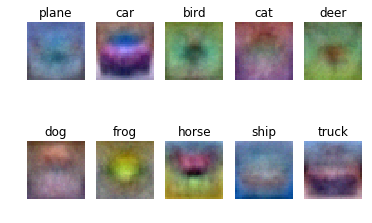

In [67]:
# Visualize the learned weights for each class
w = best_softmax.W[:-1,:] # strip out the bias
w = w.reshape(32, 32, 3, 10)

w_min, w_max = np.min(w), np.max(w)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
    plt.subplot(2, 5, i + 1)
    
    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])

In [33]:
w_min

-8.513245821917393e-05

In [34]:
w_max

0.00010484153375388131

In [63]:
best_softmax.W[:-1,:].shape

(3072, 10)

In [65]:
3072/3

1024.0

In [66]:
1024**0.5

32.0

In [78]:
w=best_softmax.W[:-1,:]
w=w.reshape(32,32,3,10)

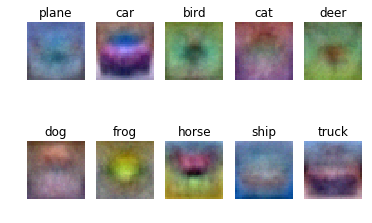

In [103]:
w=best_softmax.W[:-1,:]

w=w.reshape(32,32,3,10)
w_min,w_max=w.min(),w.max()
for i in range(10):
    plt.subplot(2,5,i+1)
    w1=w[:,:,:,i].squeeze()
    w1=(w1-w_min)/(w_max-w_min)
    plt.imshow(w1)
    plt.title(classes[i])
    plt.axis("off")
    
    